In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

plotly.offline.init_notebook_mode(connected=True)
df_ov = pd.read_csv('./outputs/gene_dropout_processing/OV8_expre_imputed_matrix/scimpute_count.csv')
df_ft = pd.read_csv('./outputs/gene_dropout_processing/C11_expre_imputed_matrix/scimpute_count.csv')

df_ov.rename({df_ov.columns[0]:'ensembl'}, axis=1, inplace=True)
df_ov_brca1_rad52 = df_ov[df_ov.ensembl.isin(['ENSG00000012048', 'ENSG00000002016'])]
df_ov_brca1_rad52.index = ['RAD52', 'BRCA1']
df_ov_brca1_rad52 = df_ov_brca1_rad52.T.iloc[1:,:]
df_ov_brca1_rad52 = df_ov_brca1_rad52.reset_index().drop('index', axis=1)
#df_ov_brca1_rad52

df_ft.rename({df_ft.columns[0]:'ensembl'}, axis=1, inplace=True)
df_ft_brca1_rad52 = df_ft[df_ft.ensembl.isin(['ENSG00000012048', 'ENSG00000002016'])]
df_ft_brca1_rad52.index = ['RAD52', 'BRCA1']
df_ft_brca1_rad52 = df_ft_brca1_rad52.T.iloc[1:,:]
df_ft_brca1_rad52 = df_ft_brca1_rad52.reset_index().drop('index', axis=1)
#df_ft_brca1_rad52

df_ov_brca1_rad52.BRCA1 = df_ov_brca1_rad52.BRCA1.astype(np.float)
df_ov_brca1_rad52.RAD52 = df_ov_brca1_rad52.RAD52.astype(np.float)
df_ft_brca1_rad52.BRCA1 = df_ft_brca1_rad52.BRCA1.astype(np.float)
df_ft_brca1_rad52.RAD52 = df_ft_brca1_rad52.RAD52.astype(np.float)

## BRCA1 and RAD52 expression distribution in OVCAR8 and FT282 cell line

- The y-axis is showing the frequency of cells expressing BRCA1/RAD52.
- The x-axis is the read count after being corrected for gene dropouts events using scImpute algorithm.   

In [9]:
ov_br = df_ov_brca1_rad52.BRCA1.values
ft_br = df_ft_brca1_rad52.BRCA1.values
ov_rd = df_ov_brca1_rad52.RAD52.values
ft_rd = df_ft_brca1_rad52.RAD52.values
hist_data = [ov_br, ft_br, ov_rd, ft_rd]
group_labels = ['BRCA1 (OVCAR8)','BRCA1 (FT282)', 'RAD52 (OVCAR8)','RAD52 (FT282)']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
plotly.offline.iplot(fig)

## Relationship between BRCA1 and RAD52 in OVCAR8

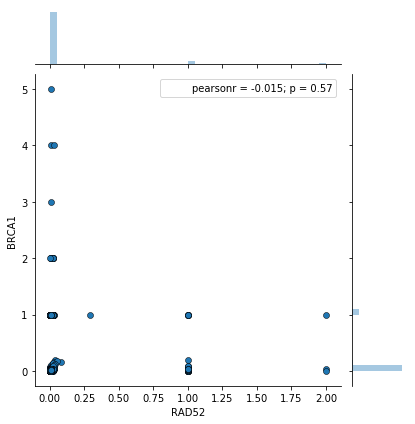

In [6]:
sns.jointplot(x='RAD52', y='BRCA1', data=df_ov_brca1_rad52, edgecolor="k", linewidth=0.5)

## Relationship between BRCA1 and RAD52 in FT282

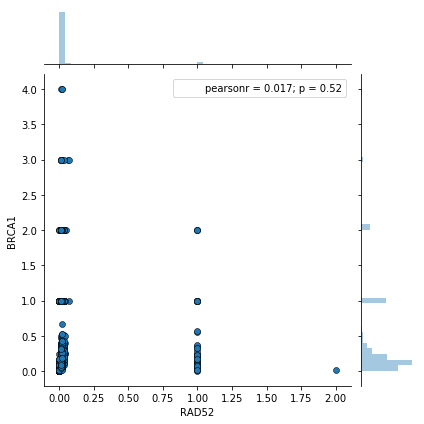

In [8]:
sns.jointplot(x='RAD52', y='BRCA1', data=df_ft_brca1_rad52, edgecolor="k", linewidth=0.5)